<a href="https://colab.research.google.com/github/anveshkumar0206/waste_classification/blob/main/Classification_dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset

In [ ]:
import os
from PIL import Image
from tqdm import tqdm

# Define the path to your dataset folder
dataset_folder = '/content/drive/Shareddrives/DATA 245 - ML/dataset-resized'
print("Dataset Folder:", dataset_folder)

# List of categories (folder names)
categories = os.listdir(dataset_folder)

# Initialize lists to store image data and labels
data = []
labels = []

# Loop through each category
for category in categories:
    category_folder = os.path.join(dataset_folder, category)

    # Loop through each image file in the category folder
    for filename in tqdm(os.listdir(category_folder), desc=f"Loading {category}"):
        image_path = os.path.join(category_folder, filename)

        # Open the image using PIL
        image = Image.open(image_path)

        # Append the image data and label to the lists
        data.append(image)
        labels.append(category)



Dataset Folder: /content/drive/Shareddrives/DATA 245 - ML/dataset-resized


Loading plastic: 100%|██████████| 482/482 [00:15<00:00, 31.43it/s] 


In [ ]:
# Print the total number of images loaded
print("Total images loaded:", len(data))

Total images loaded: 2527


In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
Categories=['cardboard','glass','metal', 'paper', 'plastic', 'trash']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/Shareddrives/DATA 245 - ML/dataset-resized'
#path which contains all the categories of images
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data
y=df.iloc[:,-1] #output data


loading... category : cardboard
loaded category:cardboard successfully
loading... category : glass
loaded category:glass successfully
loading... category : metal
loaded category:metal successfully
loading... category : paper
loaded category:paper successfully
loading... category : plastic
loaded category:plastic successfully
loading... category : trash
loaded category:trash successfully


In [ ]:
#data preprocessing
import cv2
import numpy as np
from imutils import paths
imagePath = list(paths.list_images("/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"))
def preprocess_images(imagePath, size=(150, 150)):
    # List to hold all preprocessed images
    data = []
    # Iterate through all the image paths
    for image_path in imagePath:
        # Load the image
        image = cv2.imread(image_path)
        # Resize the image to the desired size
        image = cv2.resize(image, size)
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Normalize the pixel values (0-255 to 0-1)
        normalized_image = gray_image.astype("float") / 255.0
        # Flatten the image to make it a single array
        flat_image = normalized_image.flatten()
        # Append the processed image to the data list
        data.append(flat_image)
    return np.array(data)

# Preprocess all images
processed_data = preprocess_images(imagePath)

print("Preprocessed data shape:", processed_data.shape)


Preprocessed data shape: (2527, 22500)


In [ ]:
directory = "/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"
for filename in os.listdir(directory):
    print("Current file:", filename)  # Debugging output
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Convert filename to string (if necessary)
        filename = str(filename)
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image from {image_path}")
        else:
            # Proceed with processing
            print(f"Loaded {image_path} successfully")

Current file: cardboard
Current file: glass
Current file: metal
Current file: paper
Current file: plastic
Current file: trash


In [ ]:
# Data Present

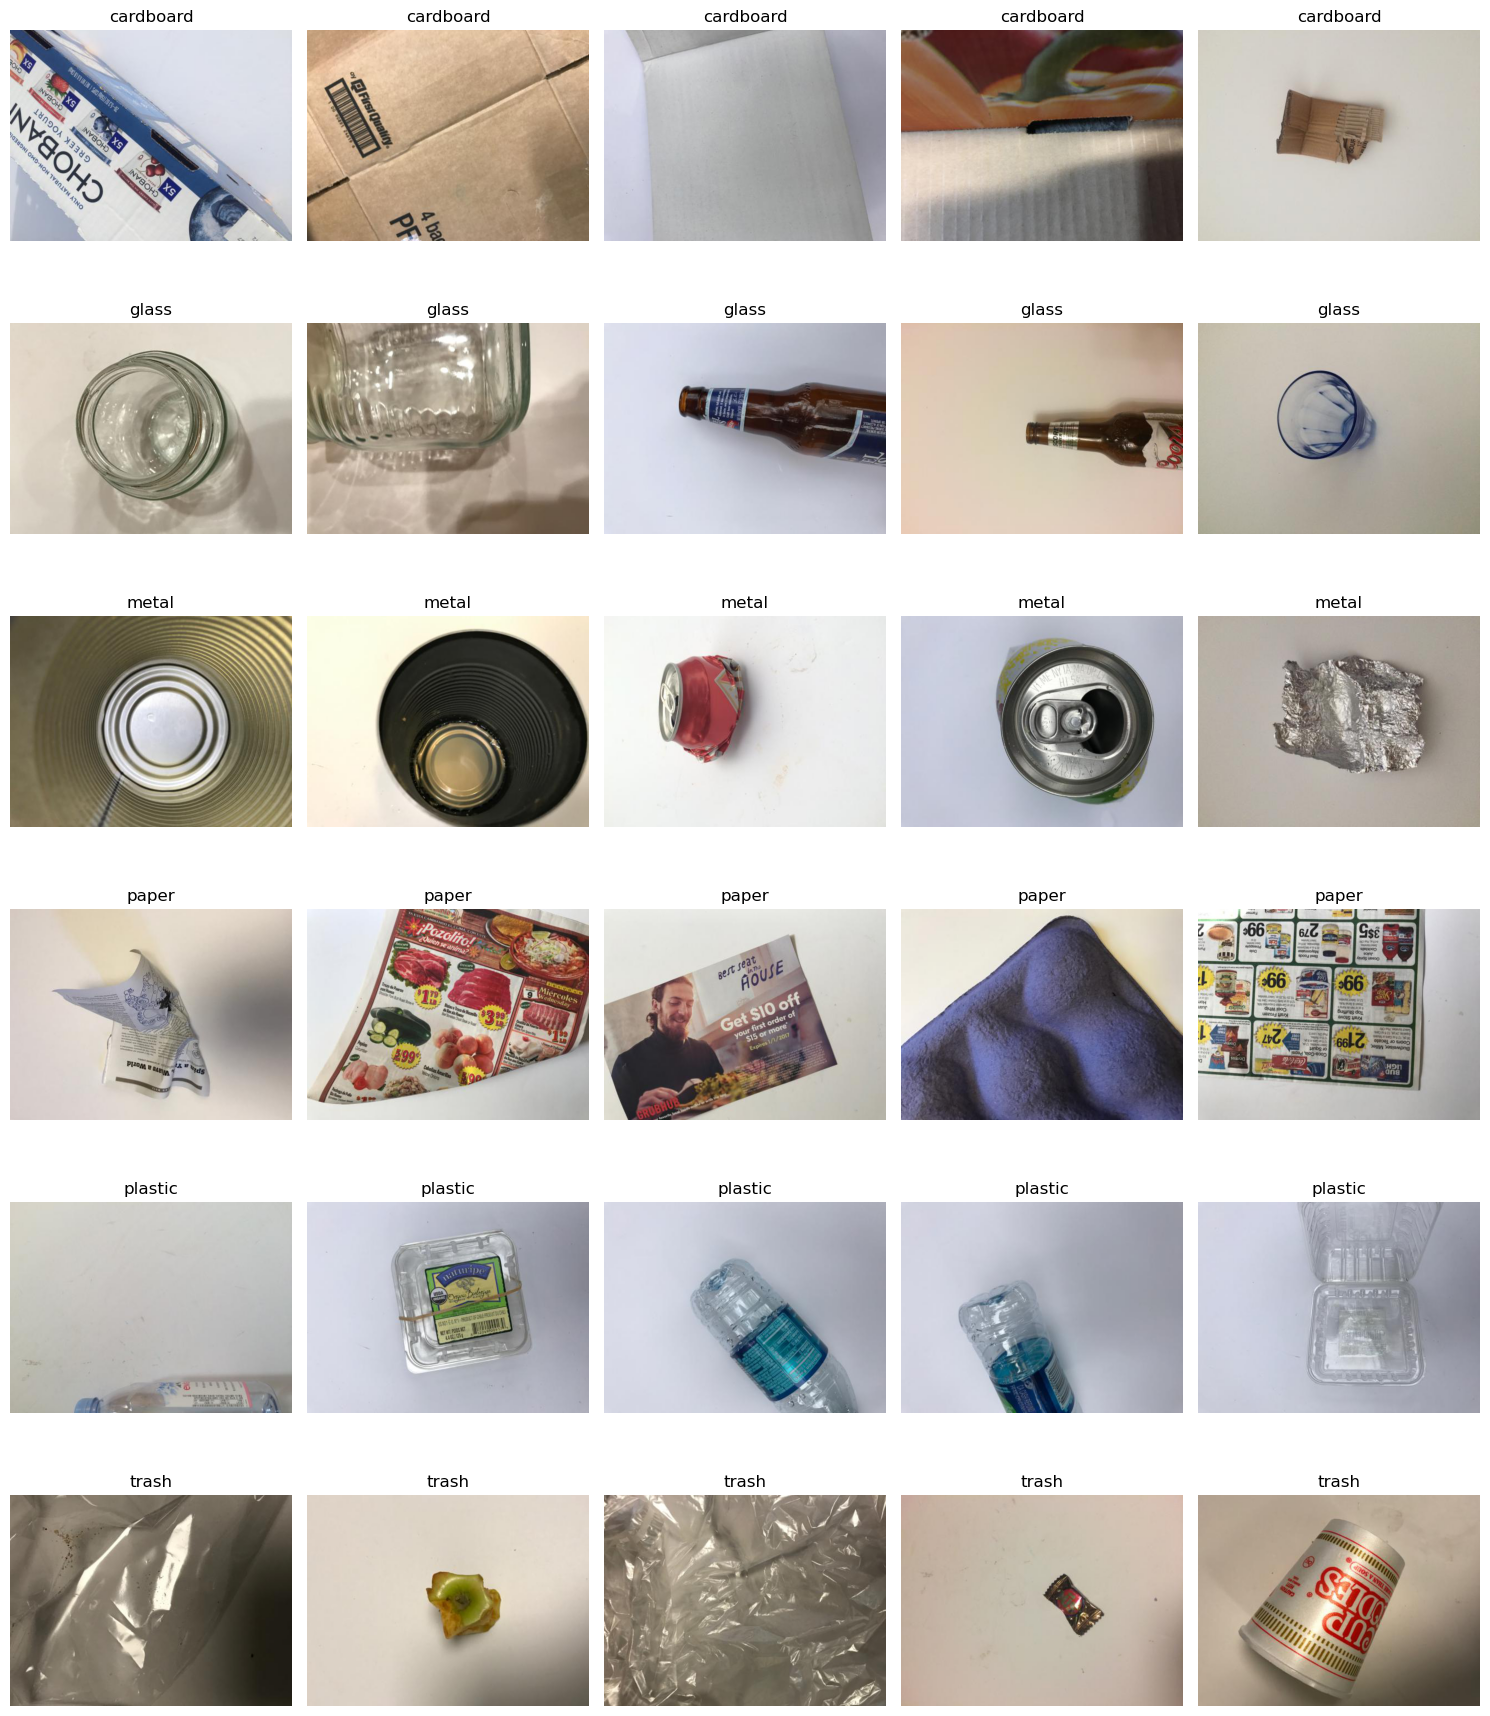

In [ ]:
import os
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

# Lists to store data
flat_data_arr = []  # input array for features
target_arr = []     # output array for target labels
image_paths = []    # store image paths for reference

# Loading images and creating features
for category in Categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = imread(img_path)
        img_resized = resize(img_array, (150, 150, 3))  # resizing to 150x150x3
        flat_data_arr.append(img_resized.flatten())  # flatten the resized image
        target_arr.append(Categories.index(category))  # append category index to target array
        image_paths.append(img_path)  # append image path for visualization

# Create DataFrame
df = pd.DataFrame(flat_data_arr)  # create a DataFrame from the flat data
df['Target'] = target_arr  # add target labels
df['Image_Path'] = image_paths  # add image paths for reference

# Function to display sample images
def display_sample_images(df, num_samples=5):
    fig, axs = plt.subplots(len(Categories), num_samples, figsize=(15, 3 * len(Categories)))
    for i, category in enumerate(Categories):
        sample_df = df[df['Target'] == i].sample(num_samples, random_state=42)  # sampling images
        for j in range(num_samples):
            img = imread(sample_df.iloc[j]['Image_Path'])
            axs[i, j].imshow(img)
            axs[i, j].set_title(f"{category}")
            axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images(df)


Feature Extraction

In [ ]:
# Feature extraction Code for all images in the dataset
"""
import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt
from imutils import paths

def extract_features(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded. Check the file path and ensure the file is accessible and not corrupted.")

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to ensure consistency
    gray_image = cv2.resize(gray_image, (150, 150))

    # 1. Edge Detection using the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

    # 2. Texture Features using Local Binary Patterns
    radius = 3
    n_points = 8 * radius
    lbp = feature.local_binary_pattern(gray_image, n_points, radius, method="uniform")
    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

    # Normalize the histogram
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)

    # 3. Color Histograms
    # Assuming you may want color histograms, we need to read the image in color mode and resize it
    color_image = cv2.imread(image_path)
    color_image = cv2.resize(color_image, (150, 150))
    color_hist = cv2.calcHist([color_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_hist = cv2.normalize(color_hist, color_hist).flatten()

    return edges, lbp_hist, color_hist

# Example usage
image_paths = list(paths.list_images("/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"))

# Iterate through the image paths, extracting and plotting features for each image
for image_path in image_paths:
    try:
        edges, lbp_hist, color_hist = extract_features(image_path)

        # Plotting the features
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].imshow(edges, cmap='gray')
        ax[0].set_title('Canny Edges')
        ax[1].bar(range(len(lbp_hist)), lbp_hist)
        ax[1].set_title('LBP Histogram')
        ax[2].bar(range(len(color_hist)), color_hist)
        ax[2].set_title('Color Histogram')
        plt.show()
    except Exception as e:
        print(f"Failed to process {image_path}: {e}")

"""

'\nimport cv2\nimport numpy as np\nfrom skimage import feature\nimport matplotlib.pyplot as plt\nfrom imutils import paths\n\ndef extract_features(image_path):\n    # Read the image\n    image = cv2.imread(image_path)\n    if image is None:\n        raise ValueError(f"Image at path {image_path} could not be loaded. Check the file path and ensure the file is accessible and not corrupted.")\n\n    # Convert to grayscale\n    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n\n    # Resize image to ensure consistency\n    gray_image = cv2.resize(gray_image, (150, 150))\n\n    # 1. Edge Detection using the Canny edge detector\n    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)\n\n    # 2. Texture Features using Local Binary Patterns\n    radius = 3\n    n_points = 8 * radius\n    lbp = feature.local_binary_pattern(gray_image, n_points, radius, method="uniform")\n    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))\n\n   

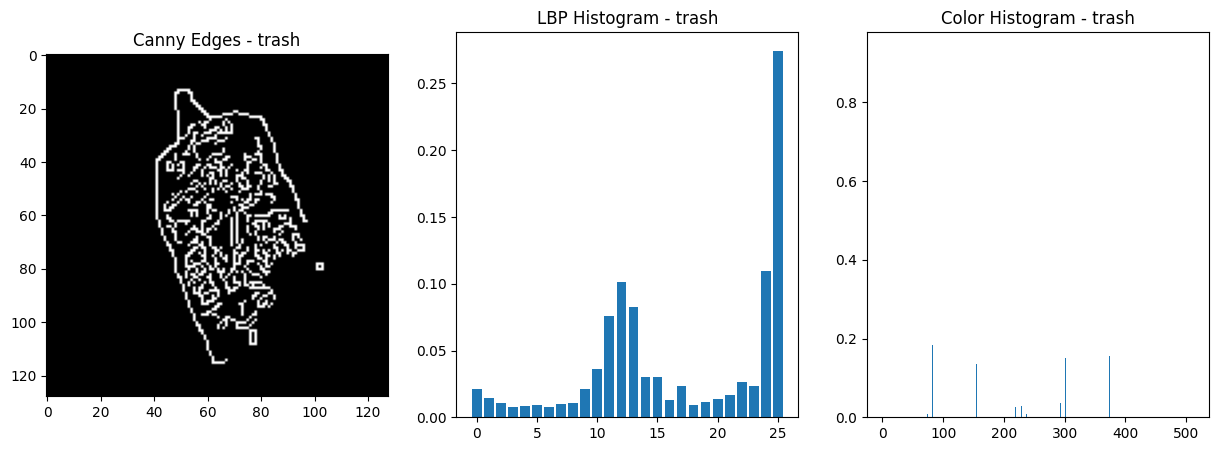

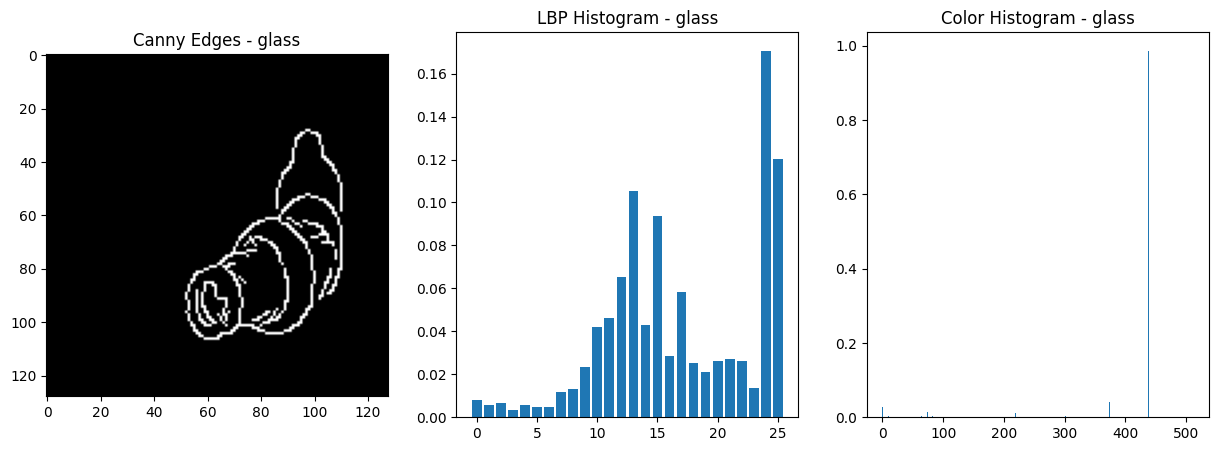

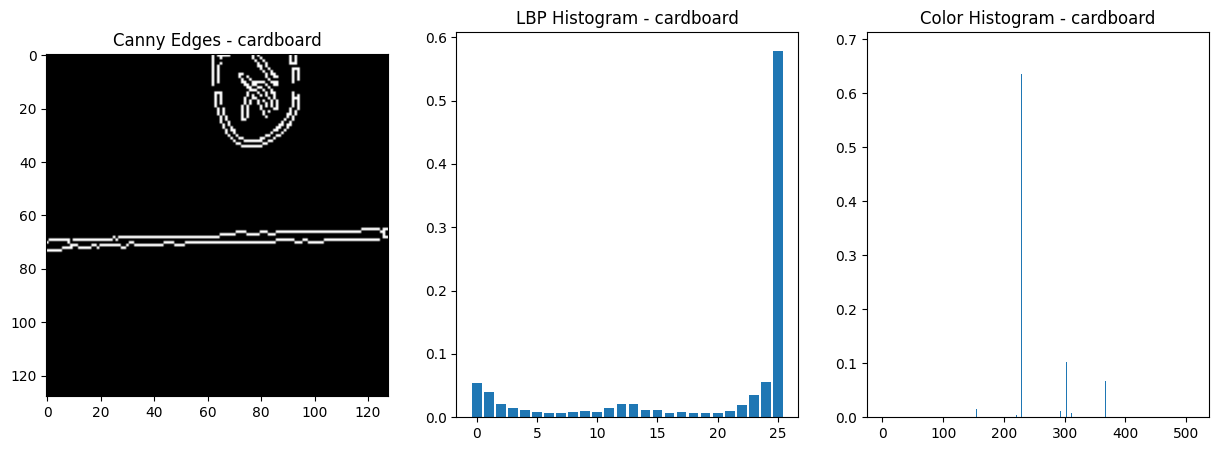

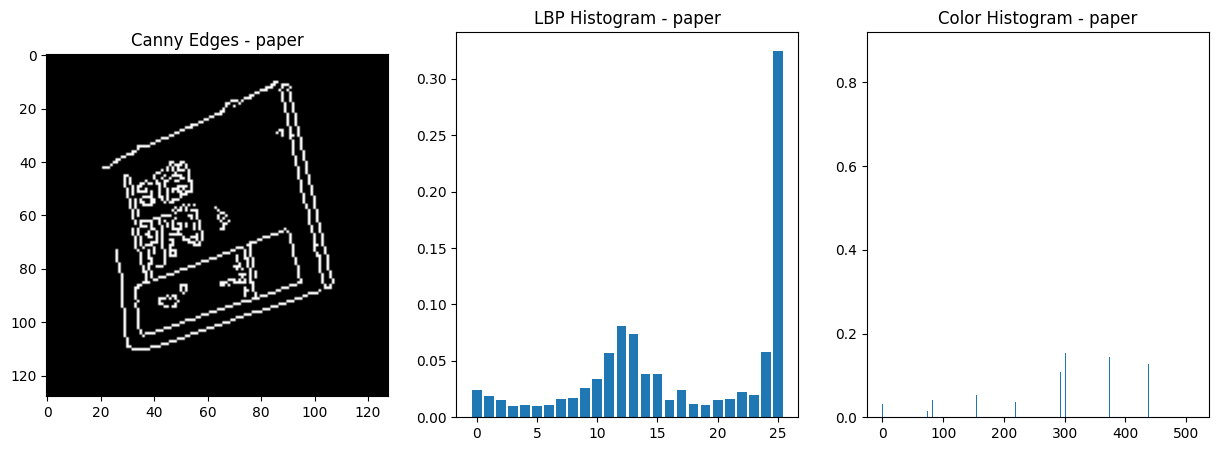

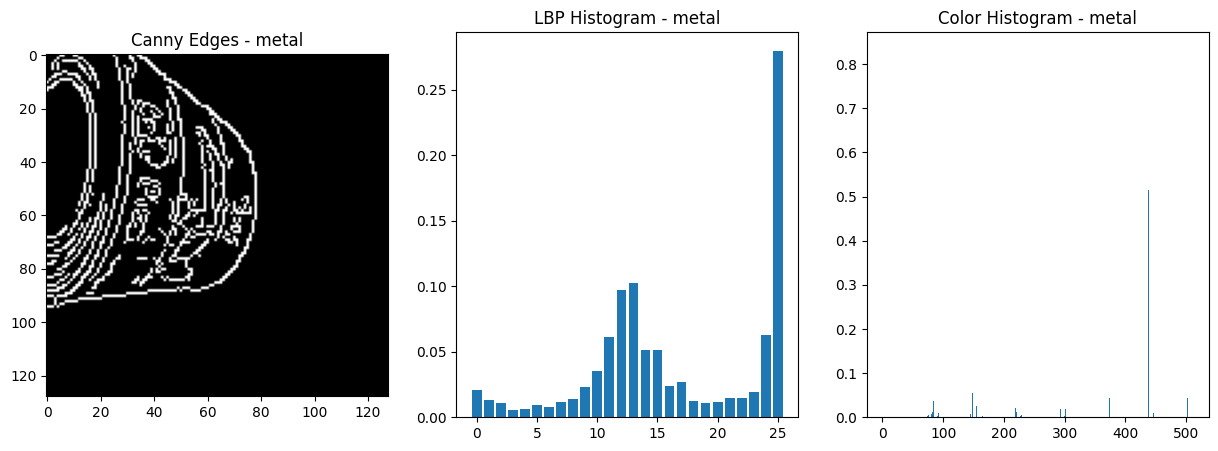

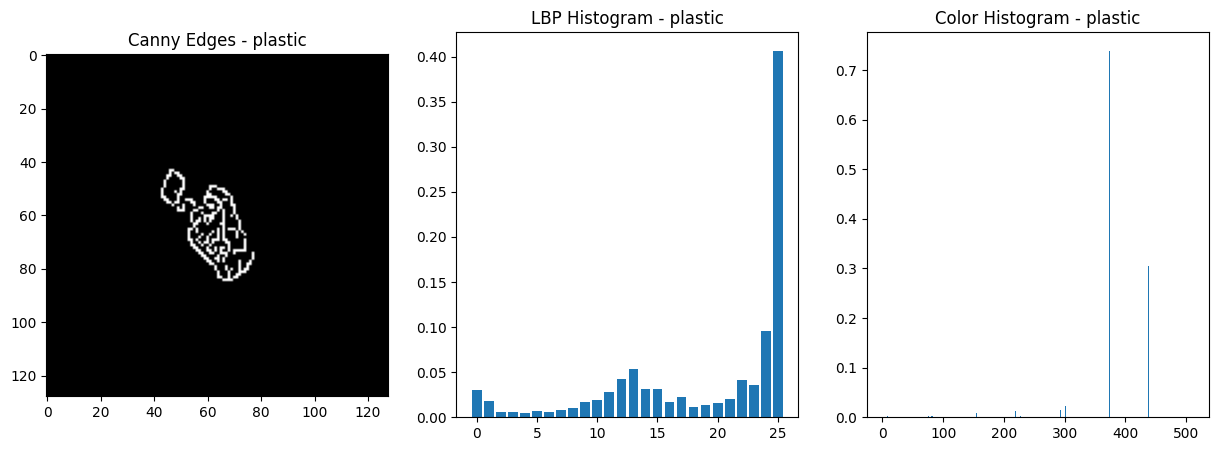

In [ ]:
import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt
from imutils import paths

def extract_features(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded. Check the file path and ensure the file is accessible and not corrupted.")

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to ensure consistency
    gray_image = cv2.resize(gray_image, (128, 128))

    # 1. Edge Detection using the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

    # 2. Texture Features using Local Binary Patterns
    radius = 3
    n_points = 8 * radius
    lbp = feature.local_binary_pattern(gray_image, n_points, radius, method="uniform")
    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

    # Normalize the histogram
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)

    # 3. Color Histograms
    # Assuming you may want color histograms, we need to read the image in color mode and resize it
    color_image = cv2.imread(image_path)
    color_image = cv2.resize(color_image, (128, 128))
    color_hist = cv2.calcHist([color_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_hist = cv2.normalize(color_hist, color_hist).flatten()

    return edges, lbp_hist, color_hist

# Example usage
image_paths = list(paths.list_images("/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"))

# Dictionary to keep track of categories and their corresponding images
category_images = {}

# Iterate through the image paths, extracting and plotting features for each image
for image_path in image_paths:
    try:
        # Extract features
        edges, lbp_hist, color_hist = extract_features(image_path)

        # Get the category from the image path
        category = image_path.split("/")[-2]  # Assuming the category is the second-to-last directory in the path

        # Check if category already has an image, if not, add it
        if category not in category_images:
            category_images[category] = (edges, lbp_hist, color_hist)

    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")

# Plot one image for each category
for category, (edges, lbp_hist, color_hist) in category_images.items():
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(edges, cmap='gray')
    ax[0].set_title(f'Canny Edges - {category}')
    ax[1].bar(range(len(lbp_hist)), lbp_hist)
    ax[1].set_title(f'LBP Histogram - {category}')
    ax[2].bar(range(len(color_hist)), color_hist)
    ax[2].set_title(f'Color Histogram - {category}')
    plt.show()

Original feature dimension: 16922
Reduced feature dimension: 1796


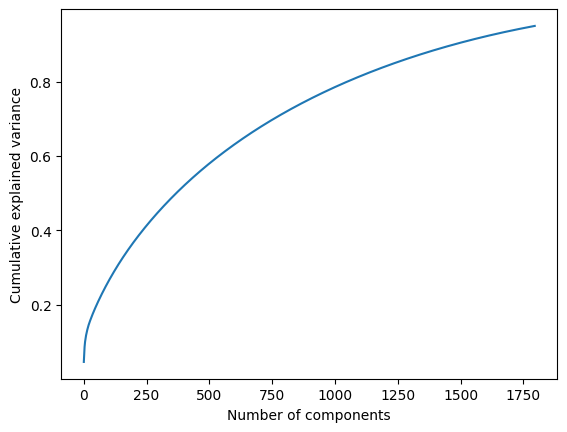

In [ ]:
# PCA
import cv2
import numpy as np
from skimage import feature
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imutils import paths
import matplotlib.pyplot as plt

# Function to concatenate features into a single vector
def create_feature_vector(edges, lbp_hist, color_hist):
    return np.hstack([edges.flatten(), lbp_hist, color_hist])

# Get list of image paths
image_paths = list(paths.list_images("/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"))

# Initialize a list to hold all feature vectors
feature_vectors = []

# Extract features for each image and create feature vectors
for image_path in image_paths:
    try:
        edges, lbp_hist, color_hist = extract_features(image_path)
        feature_vector = create_feature_vector(edges, lbp_hist, color_hist)
        feature_vectors.append(feature_vector)
    except Exception as e:
        print(f"Failed to process {image_path}: {e}")

# Convert list of feature vectors to a NumPy array
feature_matrix = np.array(feature_vectors)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
feature_matrix_scaled = scaler.fit_transform(feature_matrix)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Adjust this parameter as needed
pca_features = pca.fit_transform(feature_matrix_scaled)

# Now pca_features contains the reduced feature set for all images
print(f"Original feature dimension: {feature_matrix.shape[1]}")
print(f"Reduced feature dimension: {pca_features.shape[1]}")

# Optionally, visualize the explained variance ratio of each principal component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune this parameter
# Train the classifier
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import cv2
import numpy as np
from skimage import feature

# Function to extract features from an image
def extract_features(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.resize(gray_image, (150, 150))
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)
    radius = 3
    n_points = 8 * radius
    lbp = feature.local_binary_pattern(gray_image, n_points, radius, method="uniform")
    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)
    color_image = cv2.resize(image, (150, 150))
    color_hist = cv2.calcHist([color_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_hist = cv2.normalize(color_hist, color_hist).flatten()
    return np.hstack([edges.flatten(), lbp_hist, color_hist])

# Prepare Data
image_paths = list(paths.list_images("/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"))
data = []
labels = []

# Extract Features and Labels
for image_path in image_paths:
    try:
        features = extract_features(image_path)
        data.append(features)
        label = image_path.split("/")[-2]  # Assuming Unix-style paths
        labels.append(label)
    except Exception as e:
        print(f"Failed to process {image_path}: {e}")

# Create Feature Matrix and Labels
x = np.array(data)
y = np.array(labels)

# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train KNN Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

# Evaluate the Model
y_pred = knn_clf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.32608695652173914
Confusion Matrix:
 [[27  0  0 35  9  0]
 [ 1  0  0 90 16  0]
 [ 1  0  0 57 29  0]
 [ 1  0  0 88 29  0]
 [ 0  0  0 49 50  0]
 [ 0  0  0 21  3  0]]
              precision    recall  f1-score   support

   cardboard       0.90      0.38      0.53        71
       glass       0.00      0.00      0.00       107
       metal       0.00      0.00      0.00        87
       paper       0.26      0.75      0.38       118
     plastic       0.37      0.51      0.43        99
       trash       0.00      0.00      0.00        24

    accuracy                           0.33       506
   macro avg       0.25      0.27      0.22       506
weighted avg       0.26      0.33      0.25       506



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# After splitting the data
x_train = np.array(x_train)
x_test = np.array(x_test)

# Fit the classifier after ensuring the data is in the correct format
knn.fit(x_train, y_train)

# Then make predictions
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test, y_pred, target_names=Categories)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.4901185770750988
Confusion Matrix:
[[56 10  1  5  8  1]
 [11 54  6  5 22  2]
 [20 18 16  3 13 12]
 [16 25  3 46 28  1]
 [ 6 14  2  6 67  2]
 [ 4  9  1  1  3  9]]
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.50      0.69      0.58        81
       glass       0.42      0.54      0.47       100
       metal       0.55      0.20      0.29        82
       paper       0.70      0.39      0.50       119
     plastic       0.48      0.69      0.56        97
       trash       0.33      0.33      0.33        27

    accuracy                           0.49       506
   macro avg       0.49      0.47      0.45       506
weighted avg       0.52      0.49      0.47       506



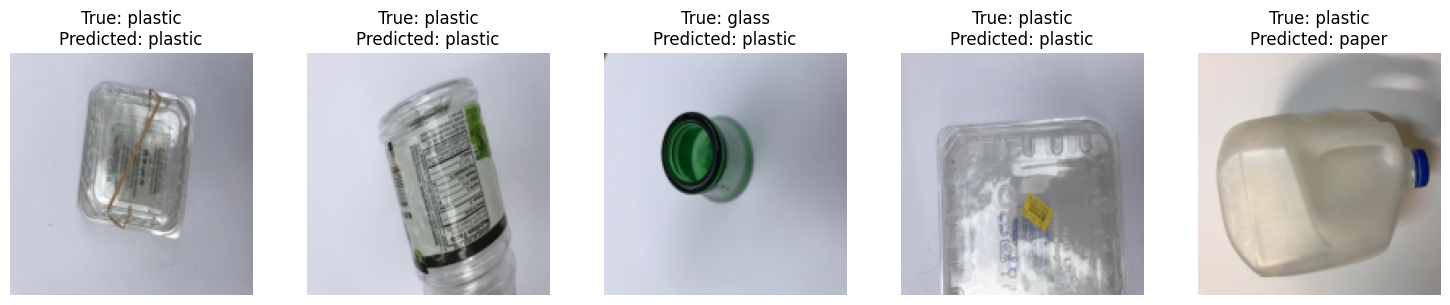

In [ ]:
import matplotlib.pyplot as plt

# Check if y_test and y_pred are pandas Series and convert them to numpy arrays if needed
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.to_numpy()

num_images = min(5, len(x_test))

fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 3))
for i in range(num_images):
    ax = axes[i] if num_images > 1 else axes
    # If x_test is a DataFrame, convert to numpy array and reshape
    if isinstance(x_test, pd.DataFrame):
        image_data = x_test.iloc[i].to_numpy().reshape(150, 150, 3)
    else:  # If x_test is a numpy array, just reshape
        image_data = x_test[i].reshape(150, 150, 3)

    ax.imshow(image_data)
    true_label = Categories[y_test[i]]
    predicted_label = Categories[y_pred[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


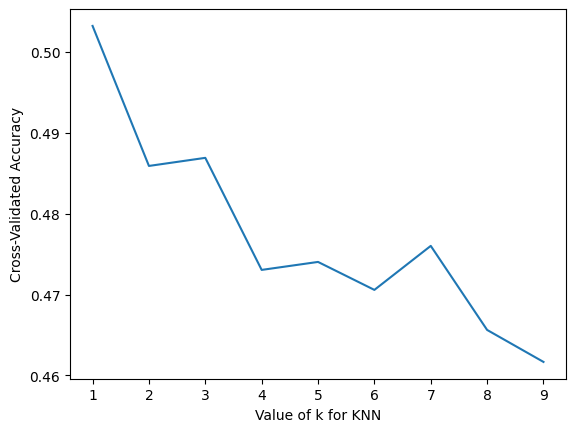

In [ ]:
# adjust K value
from sklearn.model_selection import cross_val_score

# Try different values for k
k_values = range(1, 10)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Plot the relationship between k and testing accuracy
plt.plot(k_values, accuracy_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_neighbors': list(range(1, 10)), 'metric': ['euclidean', 'manhattan']}

randomized_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
randomized_search.fit(x_train, y_train)

print("Best parameters:", randomized_search.best_params_)
print("Best cross-validation score: {:.2f}".format(randomized_search.best_score_))

Best parameters: {'n_neighbors': 3, 'metric': 'manhattan'}
Best cross-validation score: 0.57


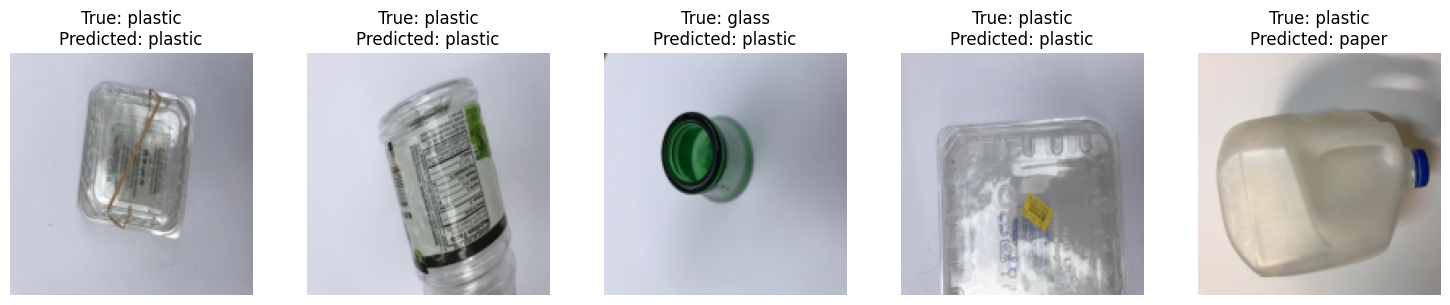

In [ ]:
import matplotlib.pyplot as plt

# Check if y_test and y_pred are pandas Series and convert them to numpy arrays
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.to_numpy()

num_images = min(5, len(x_test))

fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 3))
for i in range(num_images):
    ax = axes[i] if num_images > 1 else axes
    if isinstance(x_test, pd.DataFrame):
        image_data = x_test.iloc[i].to_numpy().reshape(150, 150, 3)
    else:  # If x_test is a numpy array, just reshape
        image_data = x_test[i].reshape(150, 150, 3)

    ax.imshow(image_data)
    true_label = Categories[y_test[i]]
    predicted_label = Categories[y_pred[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Determine the best k (with the highest cross-validation accuracy)
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"The optimal number of neighbors is {optimal_k}")

# Now you can use optimal_k in your KNN classifier
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='manhattan')
knn.fit(x_train, y_train)

# Predict on the test data
y_pred = knn.predict(x_test)

# Evaluate the classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


The optimal number of neighbors is 1
Accuracy: 0.6363636363636364
Confusion Matrix:
 [[65  5  0  5  5  1]
 [ 4 61 11  6 17  1]
 [ 6 12 35  4 16  9]
 [11 11  3 68 20  6]
 [ 3  8  7  7 70  2]
 [ 0  1  0  1  2 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        81
           1       0.62      0.61      0.62       100
           2       0.62      0.43      0.51        82
           3       0.75      0.57      0.65       119
           4       0.54      0.72      0.62        97
           5       0.55      0.85      0.67        27

    accuracy                           0.64       506
   macro avg       0.64      0.66      0.64       506
weighted avg       0.65      0.64      0.63       506



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize KNN classifier with 20 as the number of neighbors
knn = KNeighborsClassifier(n_neighbors=20, metric='manhattan')
knn.fit(x_train, y_train)  # Train the classifier using the training data

# Predict on the test data
y_pred = knn.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy with 3 neighbors: {accuracy}')
print('Confusion Matrix with 3 neighbors:\n', conf_matrix)
print('Classification Report with 3 neighbors:\n', class_report)


Accuracy with 3 neighbors: 0.5375494071146245
Confusion Matrix with 3 neighbors:
 [[63  6  0  3  9  0]
 [ 5 56  9  7 21  2]
 [12 16 19  6 25  4]
 [10 18  4 63 22  2]
 [ 3 15  4 10 62  3]
 [ 2 12  0  3  1  9]]
Classification Report with 3 neighbors:
               precision    recall  f1-score   support

           0       0.66      0.78      0.72        81
           1       0.46      0.56      0.50       100
           2       0.53      0.23      0.32        82
           3       0.68      0.53      0.60       119
           4       0.44      0.64      0.52        97
           5       0.45      0.33      0.38        27

    accuracy                           0.54       506
   macro avg       0.54      0.51      0.51       506
weighted avg       0.55      0.54      0.53       506



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize KNN classifier with 3 as the number of neighbors
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(x_train, y_train)  # Train the classifier using the training data

# Predict on the test data
y_pred = knn.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy with 3 neighbors: {accuracy}')
print('Confusion Matrix with 3 neighbors:\n', conf_matrix)
print('Classification Report with 3 neighbors:\n', class_report)


Accuracy with 3 neighbors: 0.5869565217391305
Confusion Matrix with 3 neighbors:
 [[65  5  2  3  4  2]
 [ 5 63  7  5 19  1]
 [14 16 28  1 16  7]
 [20 19  4 60 15  1]
 [ 4 14  4  5 68  2]
 [ 4 10  0  0  0 13]]
Classification Report with 3 neighbors:
               precision    recall  f1-score   support

           0       0.58      0.80      0.67        81
           1       0.50      0.63      0.56       100
           2       0.62      0.34      0.44        82
           3       0.81      0.50      0.62       119
           4       0.56      0.70      0.62        97
           5       0.50      0.48      0.49        27

    accuracy                           0.59       506
   macro avg       0.59      0.58      0.57       506
weighted avg       0.62      0.59      0.58       506



Weighted KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

weights = np.random.rand(df.shape[1] - 2)  # Random weights for illustration
# Scale features by weights
weighted_features = df.iloc[:, :-2].multiply(weights, axis=1)

# Use StandardScaler to scale these weighted features
scaler = StandardScaler()
weighted_features_scaled = scaler.fit_transform(weighted_features)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(weighted_features_scaled, df['Target'], test_size=0.20, random_state=77, stratify=df['Target'])

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Predict and evaluate
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Weighted feature KNN Accuracy: {accuracy}")

Weighted feature KNN Accuracy: 0.48616600790513836


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (balanced_accuracy_score, top_k_accuracy_score,
                             f1_score, log_loss, precision_score, recall_score, jaccard_score)
import numpy as np

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

# Initialize KNN classifier with 3 as the number of neighbors
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(x_train, y_train)  # Train the classifier using the training data

# Predict on the test data
y_pred = knn.predict(x_test)

# Calculate balanced accuracy
bal_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {bal_accuracy}')


Balanced Accuracy: 0.576774440070903


In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')


F1 Score: 0.580426950560565


In [ ]:
from sklearn.metrics import log_loss

# Calculate log loss
y_prob = knn.predict_proba(x_test)
logloss = log_loss(y_test, y_prob)
print(f'Log Loss: {logloss}')

Log Loss: 8.522692545258941


In [ ]:
from sklearn.metrics import jaccard_score

# Calculate Jaccard score
jaccard = jaccard_score(y_test, y_pred, average='weighted')
print(f'Jaccard Score: {jaccard}')

Jaccard Score: 0.4128076987546926


In [ ]:
from sklearn.metrics import recall_score

# Calculate recall (sensitivity) for each class
sensitivity_per_class = recall_score(y_test, y_pred, average=None)

# Calculate specificity for each class
num_classes = len(np.unique(y_test))
specificity_per_class = []
for i in range(num_classes):
    other_classes = [c for c in range(num_classes) if c != i]
    y_test_other = [1 if y in other_classes else 0 for y in y_test]
    y_pred_other = [1 if y in other_classes else 0 for y in y_pred]
    specificity = recall_score(y_test_other, y_pred_other)
    specificity_per_class.append(specificity)

print("Sensitivity (Recall) for each class:", sensitivity_per_class)
print("Specificity for each class:", specificity_per_class)

# Calculate the average sensitivity and specificity
average_sensitivity = sum(sensitivity_per_class) / len(sensitivity_per_class)
average_specificity = sum(specificity_per_class) / len(specificity_per_class)

print("Average Sensitivity (Recall):", average_sensitivity)
print("Average Specificity:", average_specificity)


Sensitivity (Recall) for each class: [0.80246914 0.63       0.34146341 0.50420168 0.70103093 0.48148148]
Specificity for each class: [0.8894117647058823, 0.8423645320197044, 0.9599056603773585, 0.9638242894056848, 0.8679706601466992, 0.9728601252609603]
Average Sensitivity (Recall): 0.576774440070903
Average Specificity: 0.9160561719860483


Decision Tree Classifier

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')


Splitted Successfully


In [ ]:
# Convert to numpy arrays
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

# Create DataFrame and adjust column names
df = pd.DataFrame(flat_data)  # Convert feature data to DataFrame
df.columns = [str(i) for i in df.columns]  # Ensure all column names are string
df['Target'] = target  # Add target column

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, df['Target'], test_size=0.20, random_state=42, stratify=df['Target'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_clf.fit(x_train, y_train)

# Predict on the test set
dt_pred = dt_clf.predict(x_test)

# Evaluate the classifier
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred)}")
print('Confusion Matrix:\n', confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.45849802371541504
Confusion Matrix:
 [[37  8 13 10  6  7]
 [ 5 43 15 16 16  5]
 [ 7 21 25  9 14  6]
 [11 13 12 66 11  6]
 [ 7 21  9 10 48  2]
 [ 2  2  4  4  2 13]]
              precision    recall  f1-score   support

           0       0.54      0.46      0.49        81
           1       0.40      0.43      0.41       100
           2       0.32      0.30      0.31        82
           3       0.57      0.55      0.56       119
           4       0.49      0.49      0.49        97
           5       0.33      0.48      0.39        27

    accuracy                           0.46       506
   macro avg       0.44      0.45      0.45       506
weighted avg       0.46      0.46      0.46       506



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Set up parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}
# Initialize a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best estimator
best_dtree = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Predict on the test data using the best parameters
y_pred = best_dtree.predict(x_test)
print(f'Improved Accuracy: {accuracy_score(y_test, y_pred)}')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.48
Improved Accuracy: 0.44861660079051385


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Set up parameter grid to tune the hyperparameters using random distributions
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize a RandomizedSearchCV object with 100 iterations and a random state for reproducibility
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

# Get the best estimator
best_dtree = random_search.best_estimator_
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.2f}")

# Predict on the test data using the best parameters
y_pred = best_dtree.predict(x_test)
print(f'Improved Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'min_samples_split': 14, 'min_samples_leaf': 5, 'max_depth': 10}
Best cross-validation score: 0.48
Improved Accuracy: 0.45


In [ ]:
# Decision tree classifier using PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Initialize PCA
pca = PCA(n_components=0.95)  # Adjust number of components to retain 95% of variance
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train decision tree on reduced features
dtree_pca = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                   random_state=42)
dtree_pca.fit(x_train_pca, y_train)
y_pred_pca = dtree_pca.predict(x_test_pca)
print(f'PCA-based Accuracy: {accuracy_score(y_test, y_pred_pca)}')

PCA-based Accuracy: 0.4308300395256917


In [ ]:
# k-fold cross validation (cv=10)
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)
# Perform k-fold cross-validation
scores = cross_val_score(dtree, x_train, y_train, cv=10)  # 10-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.39408867 0.49009901 0.42574257 0.40594059 0.47029703 0.3960396
 0.39108911 0.45049505 0.5049505  0.44554455]
Mean accuracy: 0.44


In [ ]:
# k-fold cross validation (cv= 3)
from sklearn.model_selection import cross_val_score

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)

# Perform k-fold cross-validation
scores = cross_val_score(dtree, x_train, y_train, cv=3)  # 3-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.45252226 0.44510386 0.46656761]
Mean accuracy: 0.45


In [ ]:
# bootstrap sampling
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a bagging classifier with decision trees
bagging_clf = BaggingClassifier(random_state=42, n_estimators=50, n_jobs=-1)

# Train the classifier
bagging_clf.fit(x_train, y_train)

# Predict on the test data
y_pred_bagging = bagging_clf.predict(x_test)

# Evaluate the classifier
print(f'Bagging Accuracy: {accuracy_score(y_test, y_pred_bagging)}')
print('Bagging Confusion Matrix:\n', confusion_matrix(y_test, y_pred_bagging))
print('Bagging Classification Report:\n', classification_report(y_test, y_pred_bagging))


Bagging Accuracy: 0.6245059288537549
Bagging Confusion Matrix:
 [[55  5  9  7  5  0]
 [ 4 62 12  7 14  1]
 [11 19 39  1 11  1]
 [ 6  9 10 85  8  1]
 [ 5 13  9  6 64  0]
 [ 2  7  3  2  2 11]]
Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67        81
           1       0.54      0.62      0.58       100
           2       0.48      0.48      0.48        82
           3       0.79      0.71      0.75       119
           4       0.62      0.66      0.64        97
           5       0.79      0.41      0.54        27

    accuracy                           0.62       506
   macro avg       0.64      0.59      0.61       506
weighted avg       0.63      0.62      0.63       506



In [ ]:
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, top_k_accuracy_score, average_precision_score,
                             brier_score_loss, f1_score, log_loss, precision_score, recall_score, jaccard_score,
                             roc_auc_score, classification_report)
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np


In [ ]:
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, top_k_accuracy_score,
                             average_precision_score, f1_score, precision_score, recall_score,
                             jaccard_score, roc_auc_score, log_loss)


In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, top_k_accuracy_score, average_precision_score, f1_score, precision_score, recall_score, jaccard_score, roc_auc_score, log_loss

# Create RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
random_forest_clf.fit(x_train, y_train)

# Predict probabilities for test data
y_probs_rf = random_forest_clf.predict_proba(x_test)

# Print additional metrics
y_pred_rf = random_forest_clf.predict(x_test)
print('Balanced Accuracy:', balanced_accuracy_score(y_test, y_pred_rf))
print('Top-2 Accuracy:', top_k_accuracy_score(y_test, y_probs_rf, k=2))
#print('Average Precision:', average_precision_score(y_test, y_probs_rf[:, 1]))
print('F1 Score:', f1_score(y_test, y_pred_rf, average='macro'))
print('Precision:', precision_score(y_test, y_pred_rf, average='macro'))
print('Recall:', recall_score(y_test, y_pred_rf, average='macro'))
print('Jaccard:', jaccard_score(y_test, y_pred_rf, average='macro'))
#print('ROC AUC:', roc_auc_score(y_test, y_probs_rf[:, 1]))
print('Negative Log Loss:', log_loss(y_test, y_probs_rf))


Balanced Accuracy: 0.6291239359432204
Top-2 Accuracy: 0.8537549407114624
F1 Score: 0.6420553640544602
Precision: 0.6936234931041853
Recall: 0.6291239359432204
Jaccard: 0.48152380349774854
Negative Log Loss: 1.1010232115964078


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Calculate sensitivity and specificity for each class
sensitivity_per_class = []
specificity_per_class = []
for i in range(conf_matrix.shape[0]):
    true_positives = conf_matrix[i, i]
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    true_negatives = np.sum(conf_matrix) - true_positives - false_negatives - false_positives

    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)

    sensitivity_per_class.append(sensitivity)
    specificity_per_class.append(specificity)

# Calculate average sensitivity and specificity
average_sensitivity = np.mean(sensitivity_per_class)
average_specificity = np.mean(specificity_per_class)

print("Average Sensitivity:", average_sensitivity)
print("Average Specificity:", average_specificity)


Average Sensitivity: 0.6291239359432204
Average Specificity: 0.9336341934257085


In [ ]:
# Decision Tree Classifier with the help of features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare Data
image_paths = list(paths.list_images("/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"))
data = []
labels = []

# Extract Features and Labels
for image_path in image_paths:
    try:
        edges, lbp_hist, color_hist = extract_features(image_path)
        features = np.hstack([edges.flatten(), lbp_hist, color_hist])
        data.append(features)

        # Extract label from image_path, assuming the folder name is the class label
        label = image_path.split("/")[-2]  # Assuming Unix-style paths
        labels.append(label)
    except Exception as e:
        print(f"Failed to process {image_path}: {e}")

# Create Feature Matrix and Labels
x = np.array(data)
y = np.array(labels)

# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Evaluate the Model
y_pred = clf.predict(x_test)
print(f' Decision Tree classifier Accuracy: {accuracy_score(y_test, y_pred)}')
print('Decision Tree classifier confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 Decision Tree classifier Accuracy: 0.6086956521739131
Decision Tree classifier confusion Matrix:
 [[54  2  8  3  4  1]
 [ 2 59 21  9 12  6]
 [ 9 13 43  8  6  6]
 [ 5  6  7 87 16  6]
 [ 7  9  6 13 55  3]
 [ 0  3  4  2  1 10]]
              precision    recall  f1-score   support

   cardboard       0.70      0.75      0.72        72
       glass       0.64      0.54      0.59       109
       metal       0.48      0.51      0.49        85
       paper       0.71      0.69      0.70       127
     plastic       0.59      0.59      0.59        93
       trash       0.31      0.50      0.38        20

    accuracy                           0.61       506
   macro avg       0.57      0.60      0.58       506
weighted avg       0.62      0.61      0.61       506



In [ ]:
# Using Bagging classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare Data
image_paths = list(paths.list_images("/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"))
data = []
labels = []

# Extract Features and Labels
for image_path in image_paths:
    try:
        edges, lbp_hist, color_hist = extract_features(image_path)
        features = np.hstack([edges.flatten(), lbp_hist, color_hist])
        data.append(features)

        # Extract label from image_path, assuming the folder name is the class label
        label = image_path.split("/")[-2]  # Assuming Unix-style paths
        labels.append(label)
    except Exception as e:
        print(f"Failed to process {image_path}: {e}")

# Create Feature Matrix and Labels
x = np.array(data)
y = np.array(labels)

# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Bootstrap Sampling Decision Tree Classifier
bagging_clf = BaggingClassifier(n_estimators=50, random_state=42)
bagging_clf.fit(x_train, y_train)

# Evaluate the Model
y_pred = bagging_clf.predict(x_test)
print(f'Bagging Accuracy: {accuracy_score(y_test, y_pred)}')
print('Bagging Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Bagging Accuracy: 0.7964426877470355
Bagging Confusion Matrix:
 [[ 63   5   2   0   2   0]
 [  1  88   6   6   7   1]
 [  5  14  58   5   3   0]
 [  1   3   3 115   3   2]
 [  1  14   6   6  65   1]
 [  1   3   1   1   0  14]]
              precision    recall  f1-score   support

   cardboard       0.88      0.88      0.88        72
       glass       0.69      0.81      0.75       109
       metal       0.76      0.68      0.72        85
       paper       0.86      0.91      0.88       127
     plastic       0.81      0.70      0.75        93
       trash       0.78      0.70      0.74        20

    accuracy                           0.80       506
   macro avg       0.80      0.78      0.79       506
weighted avg       0.80      0.80      0.80       506



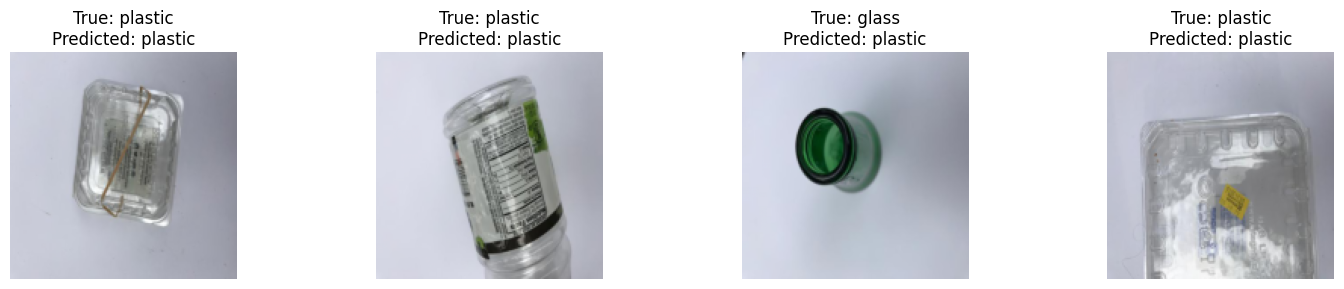

In [ ]:
import matplotlib.pyplot as plt

# Check if y_test and y_pred are pandas Series and convert them to numpy arrays
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.to_numpy()

# Determine the number of images to display (min between 5 and the length of x_test)
num_images = min(4, len(x_test))
fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 3))
for i in range(num_images):
    ax = axes[i] if num_images > 1 else axes
    # If x_test is a DataFrame, convert to numpy array and reshape
    if isinstance(x_test, pd.DataFrame):
        image_data = x_test.iloc[i].to_numpy().reshape(150, 150, 3)
    else:  # If x_test is a numpy array, just reshape
        image_data = x_test[i].reshape(150, 150, 3)

    ax.imshow(image_data)
    true_label = Categories[y_test[i]]
    predicted_label = Categories[y_pred[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate sensitivity and specificity for each class
sensitivity_per_class = []
specificity_per_class = []

for i in range(conf_matrix.shape[0]):
    true_positive = conf_matrix[i, i]
    false_negative = np.sum(conf_matrix[i, :]) - true_positive
    false_positive = np.sum(conf_matrix[:, i]) - true_positive
    true_negative = np.sum(conf_matrix) - true_positive - false_negative - false_positive

    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    sensitivity_per_class.append(sensitivity)
    specificity_per_class.append(specificity)

# Calculate average sensitivity and specificity
average_sensitivity = np.mean(sensitivity_per_class)
average_specificity = np.mean(specificity_per_class)

print("Average Sensitivity:", average_sensitivity)
print("Average Specificity:", average_specificity)


Average Sensitivity: 0.7781881554873622
Average Specificity: 0.95770451393579


In [ ]:
# Metrics

In [ ]:
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, top_k_accuracy_score, average_precision_score, f1_score, precision_score, recall_score, jaccard_score, roc_auc_score, log_loss

bagging_clf = BaggingClassifier(n_estimators=50, random_state=42)
bagging_clf.fit(x_train, y_train)

# Predict probabilities for test data
y_probs_rf = bagging_clf.predict_proba(x_test)

# Print metrics
y_pred = bagging_clf.predict(x_test)
print('Balanced Accuracy:', balanced_accuracy_score(y_test, y_pred))
print('Top-2 Accuracy:', top_k_accuracy_score(y_test, y_probs_rf, k=2))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('Jaccard:', jaccard_score(y_test, y_pred, average='macro'))
print('Negative Log Loss:', log_loss(y_test, y_probs_rf))

Balanced Accuracy: 0.7781881554873622
Top-2 Accuracy: 0.9189723320158103
F1 Score: 0.7856936971430147
Precision: 0.797668452079455
Recall: 0.7781881554873622
Jaccard: 0.6522946336583207
Negative Log Loss: 0.8531278586651488
